<a href="https://colab.research.google.com/github/AbbasAli01/Machine-Learning-Projects/blob/main/Medical_Insurance_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('Medical_insurance.csv')

In [76]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
df.shape

(2772, 7)

In [78]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [79]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [80]:
df.groupby('sex', as_index=False)['charges'].mean()

,sex,charges
0,female,12486.831977
1,male,14013.872721


In [81]:
import plotly.express as px
fig_sex = px.bar(df.groupby('sex', as_index=False)['charges'].mean(),
                    x='sex', y='charges',
                    title='Average Charges for Male & Female',
                    labels={'charges': 'Average Charges', 'sex': 'Sex'})
fig_sex.show()

In [82]:
df.groupby('children', as_index=False)['charges'].mean()

,children,charges
0,0,12317.920881
1,1,12722.650521
2,2,15268.182723
3,3,15304.070620
4,4,13550.983876
5,5,8706.036629


In [83]:
fig_childrens = px.bar(df.groupby('children', as_index=False)['charges'].mean(),
                    x='children', y='charges',
                    title='Average Charges for having X number of childrens',
                    labels={'charges': 'Average Charges', 'children': 'No. of Childrens'})
fig_childrens.show()

In [84]:
df.groupby('smoker', as_index=False)['charges'].mean()

,smoker,charges
0,no,8417.874411
1,yes,32223.139764


In [85]:
fig_smoker = px.bar(df.groupby('smoker', as_index=False)['charges'].mean(),
                    x='smoker', y='charges',
                    title='Average Charges for Smokers vs Non-Smokers',
                    labels={'charges': 'Average Charges', 'smoker': 'Smoker'})
fig_smoker.show()

In [86]:
df.groupby('region', as_index=False)['charges'].mean()

,region,charges
0,northeast,13475.874737
1,northwest,12463.129315
2,southeast,14748.777706
3,southwest,12164.196435


In [87]:
fig_region = px.bar(df.groupby('region', as_index=False)['charges'].mean(),
                    x='region', y='charges',
                    title='Average Charges based on Regions',
                    labels={'charges': 'Average Charges', 'region': 'Regions'})
fig_region.show()

In [88]:
fig_age = px.scatter(df, x='age', y='charges',
                             title='Age vs Charges',
                             labels={'age': 'Age', 'charges': 'Charges'},
                             trendline="ols")
fig_age.show()

In [89]:
fig_bmi = px.scatter(df, x='bmi', y='charges',
                             title='BMI vs Charges',
                             labels={'bmi': 'BMI', 'charges': 'Charges'},
                             trendline="ols")
fig_bmi.show()

In [90]:
numerical_features = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numerical_features].corr()

In [91]:
fig = px.imshow(corr_matrix,
                text_auto=True,
                title='Correlation Heatmap of Medical Insurance Dataset',
                labels={'color': 'Correlation Coefficient'},
                color_continuous_scale='Blues')

# Show the plot
fig.show()

In [92]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [93]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [94]:
df = pd.get_dummies(df, columns=['region'])

In [95]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [96]:
df[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']] = \
    df[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].astype(int)

In [97]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [98]:
df.head(20)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

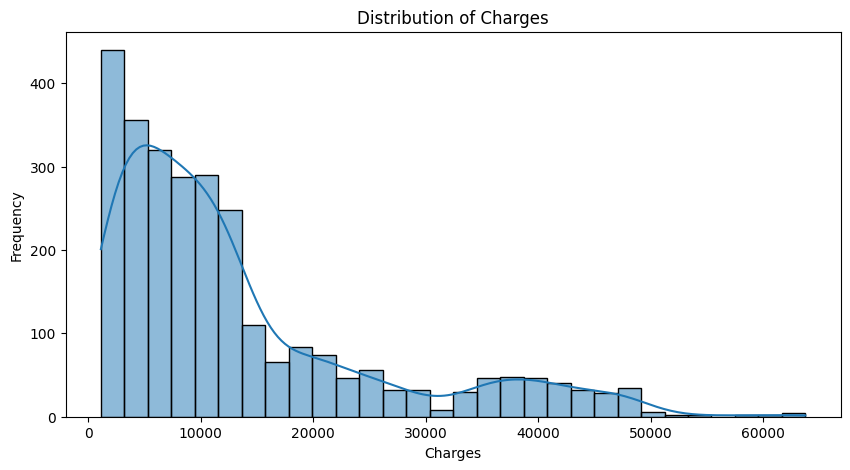

In [100]:
plt.figure(figsize=(10, 5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [101]:
df['charges'].max(), df['charges'].min(), df['charges'].mean()

(63770.42801, 1121.8739, 13261.369959046897)

In [102]:
bins = [0, 10000, 30000, 50000, 70000]  # Bins for charges
labels = ['<10000', '<30000', '<50000', '<70000']  # Labels for bins

df['charge_category'] = pd.cut(df['charges'], bins=bins, labels=labels)

In [103]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,charge_category
0,19,0,27.900,0,1,16884.92400,0,0,0,1,<30000
1,18,1,33.770,1,0,1725.55230,0,0,1,0,<10000
2,28,1,33.000,3,0,4449.46200,0,0,1,0,<10000
3,33,1,22.705,0,0,21984.47061,0,1,0,0,<30000
4,32,1,28.880,0,0,3866.85520,0,1,0,0,<10000


In [104]:
from sklearn.model_selection import train_test_split

X = df.drop(['charges', 'charge_category'], axis=1)
y = df['charge_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)

accuracy_score(y_test, rfc_prediction)

0.9693693693693693

In [106]:
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

      <10000       0.97      0.98      0.98       303
      <30000       0.97      0.95      0.96       189
      <50000       0.97      1.00      0.98        59
      <70000       1.00      0.50      0.67         4

    accuracy                           0.97       555
   macro avg       0.98      0.86      0.90       555
weighted avg       0.97      0.97      0.97       555

